# NLP (Natural Language Processing) with Python


In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                      names = ['label','messages'])

In [3]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#  Exploratory Data Analysis

Let's explore the data 

In [4]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
messages.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [7]:
messages['length'] = messages['messages'].apply(len)

In [8]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualization
Let's visualize this! Let's do the imports:

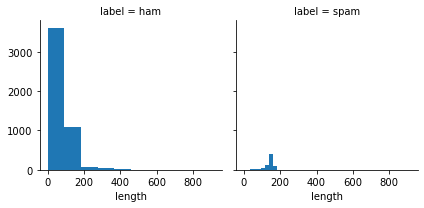

In [9]:
g = sns.FacetGrid(messages,col='label')
g.map(plt.hist,'length')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

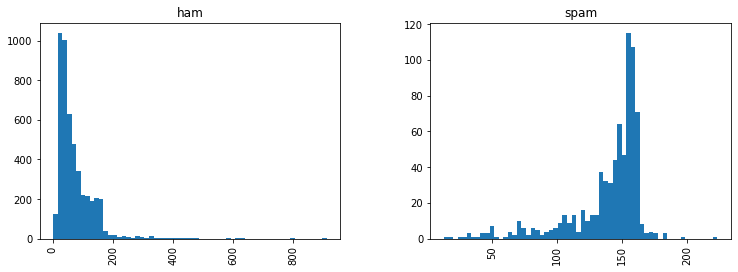

In [11]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

<AxesSubplot:xlabel='length', ylabel='count'>

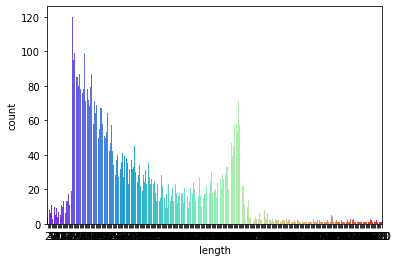

In [12]:
sns.countplot(x='length',data=messages,palette='rainbow')

In [13]:
print('Highest message length:',messages['length'].max())

Highest message length: 910


# Text Pre-processing

In [14]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
messages['messages'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(messages['messages'], messages['label'], test_size=0.3, random_state=101)

# Naive Bayes Classifier Algorithm
Creating a Data Pipeline

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
naive_bayes = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('naive bayes classifier',MultinomialNB())
])

In [20]:
naive_bayes.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001613DEE3F70>)),
                ('tfidf', TfidfTransformer()),
                ('naive bayes classifier', MultinomialNB())])

In [21]:
pred = naive_bayes.predict(X_test)

In [22]:
print(confusion_matrix(y_test,pred))

[[1475    0]
 [  68  129]]


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672



### ACCURACY = 96%

# RandomForest Classifier Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('random forest classifier',RandomForestClassifier(n_estimators=200))
])

In [ ]:
random_forest.fit(X_train,y_train)

In [ ]:
pred1 = random_forest.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred1))

In [ ]:
print(classification_report(y_test,pred1))

### ACCURACY = 97% 


# CONCLUSION

we get 96% on naive bayes algoritham and 97% on random forest algoritham by camparing them random forest gives more accuracy.